<a href="https://colab.research.google.com/github/xoaryaa/NER-in-Indian-Headlines/blob/main/aist_conf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers datasets flair spacy seqeval stanza scikit-learn
!python -m spacy download en_core_web_sm
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 28.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 37.6 MB/s eta 0:00:00

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import json
from google.colab import files
uploaded = files.upload()

def load_labelstudio_json(path):
    with open(path, 'r') as f:
        data = json.load(f)

    dataset = []
    for entry in data:
        text = entry['data']['text']
        labels = entry['annotations'][0]['result']

        entities = []
        for label in labels:
            start = label['value']['start']
            end = label['value']['end']
            entity = label['value']['labels'][0]
            entities.append((start, end, entity))

        dataset.append({
            'text': text,
            'entities': entities
        })
    return dataset

dataset = load_labelstudio_json("annotated_ner-238.json")
print(dataset[0])


Saving annotated_ner-238.json to annotated_ner-238.json
{'text': 'Narendra Modi visited Ayodhya during Diwali celebrations.', 'entities': [(0, 13, 'PERSON'), (22, 29, 'LOC'), (37, 43, 'EVENT')]}


In [ ]:
import re
from nltk.tokenize import word_tokenize

# def convert_to_bio(dataset):
#     bio_data = []

#     for item in dataset:
#         text = item["text"]
#         entities = item["entities"]
#         tokens = word_tokenize(text)
#         tags = ["O"] * len(tokens)

#         for start, end, label in entities:
#             span_text = text[start:end]
#             span_tokens = word_tokenize(span_text)
#             for i, tok in enumerate(tokens):
#                 if tok == span_tokens[0] and tokens[i:i+len(span_tokens)] == span_tokens:
#                     tags[i] = "B-" + label
#                     for j in range(1, len(span_tokens)):
#                         if i + j < len(tags):
#                             tags[i + j] = "I-" + label
#                     break
#         bio_data.append(list(zip(tokens, tags)))

#     return bio_data


In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline

bert_model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")
bert_tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
bert_pipe = pipeline("ner", model=bert_model, tokenizer=bert_tokenizer, aggregation_strategy="simple")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
from flair.models import SequenceTagger
from flair.data import Sentence

flair_tagger = SequenceTagger.load("ner")


pytorch_model.bin:   0%|          | 0.00/419M [00:00<?, ?B/s]

2025-08-14 04:37:06,555 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, S-ORG, S-MISC, B-PER, E-PER, S-LOC, B-ORG, E-ORG, I-PER, S-PER, B-MISC, I-MISC, E-MISC, I-ORG, B-LOC, E-LOC, I-LOC, <START>, <STOP>


In [ ]:
import spacy
nlp_spacy = spacy.load("en_core_web_sm")


In [ ]:
import stanza
stanza.download("en")
nlp_stanza = stanza.Pipeline("en", processors="tokenize,ner")


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...


INFO:stanza:Downloaded file to /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package                   |
-----------------------------------------
| tokenize  | combined                  |
| mwt       | combined                  |
| ner       | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


In [ ]:
def convert_to_bio(dataset, tokenizer=bert_tokenizer):
    bio_data = []

    for item in dataset:
        text = item["text"]
        entities = item["entities"]
        encoding = tokenizer(text, return_offsets_mapping=True)
        tokens = tokenizer.convert_ids_to_tokens(encoding["input_ids"])
        offsets = encoding["offset_mapping"]
        tags = ["O"] * len(tokens)

        for start, end, label in entities:
            for i, (token_start, token_end) in enumerate(offsets):
                if token_start == start:
                    tags[i] = "B-" + label
                elif token_start > start and token_end <= end:
                    tags[i] = "I-" + label

        bio_data.append(list(zip(tokens, tags)))

    return bio_data
bio_data = convert_to_bio(dataset)
print(bio_data[0])


[('[CLS]', 'B-PERSON'), ('Na', 'B-PERSON'), ('##ren', 'I-PERSON'), ('##dra', 'I-PERSON'), ('Mo', 'I-PERSON'), ('##di', 'I-PERSON'), ('visited', 'O'), ('A', 'B-LOC'), ('##yo', 'I-LOC'), ('##dh', 'I-LOC'), ('##ya', 'I-LOC'), ('during', 'O'), ('Di', 'B-EVENT'), ('##wal', 'I-EVENT'), ('##i', 'I-EVENT'), ('celebrations', 'O'), ('.', 'O'), ('[SEP]', 'B-PERSON')]


In [ ]:
def normalize_label(label):
    mapping = {
        "PER": "PERSON",
        "PERSON": "PERSON",
        "ORG": "ORG",
        "ORGANIZATION": "ORG",
        "GPE": "LOC",
        "LOCATION": "LOC",
        "LOC": "LOC",
        "MISC": "MISC",
        "EVENT": "EVENT",
        "NORP": "MISC",
        "CARDINAL": "MISC",
        "PRODUCT": "MISC",
        "DATE": "MISC"
    }
    return mapping.get(label.upper(), label.upper())


In [ ]:
# from transformers import pipeline

# bert_pipeline = pipeline("ner", model="dslim/bert-base-NER", aggregation_strategy="simple")

# def predict_with_bert(text):
#     results = bert_pipeline(text)
#     entities = []
#     for ent in results:
#         start, end = ent['start'], ent['end']
#         label = normalize_label(ent['entity_group'])
#         entities.append((start, end, label))
#     return entities


# bert_preds = []
# for item in dataset:
#     text = item['text']
#     preds = predict_with_bert(text, bert_pipe)
#     bert_preds.append({'text': text, 'predicted_entities': preds})

from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline

bert_tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
bert_model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")
bert_ner = pipeline("ner", model=bert_model, tokenizer=bert_tokenizer, aggregation_strategy="simple")

def predict_with_bert(text):
    preds = bert_ner(text)
    entities = []
    for ent in preds:
        entities.append((ent["start"], ent["end"], ent["entity_group"]))
    return entities


Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


In [ ]:
# from flair.models import SequenceTagger
# from flair.data import Sentence

# flair_tagger = SequenceTagger.load("flair/ner-english")

# def predict_with_flair(text):
#     sentence = Sentence(text)
#     flair_tagger.predict(sentence)
#     entities = []
#     for entity in sentence.get_spans('ner'):
#         start = entity.start_position
#         end = entity.end_position
#         label = normalize_label(entity.get_label("ner").value)
#         entities.append((start, end, label))
#     return entities
from flair.data import Sentence
from flair.models import SequenceTagger

flair_model = SequenceTagger.load("ner")

def predict_with_flair(text):
    sentence = Sentence(text)
    flair_model.predict(sentence)
    entities = []
    for entity in sentence.get_spans('ner'):
        entities.append((entity.start_position, entity.end_position, entity.tag))
    return entities


2025-08-14 04:37:27,774 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, S-ORG, S-MISC, B-PER, E-PER, S-LOC, B-ORG, E-ORG, I-PER, S-PER, B-MISC, I-MISC, E-MISC, I-ORG, B-LOC, E-LOC, I-LOC, <START>, <STOP>


In [ ]:
# import spacy
# nlp_spacy = spacy.load("en_core_web_sm")

# def predict_with_spacy(text):
#     doc = nlp_spacy(text)
#     entities = []
#     for ent in doc.ents:
#         label = normalize_label(ent.label_)
#         entities.append((ent.start_char, ent.end_char, label))
#     return entities

import spacy

nlp_spacy = spacy.load("en_core_web_sm")  # or custom model

def predict_with_spacy(text):
    doc = nlp_spacy(text)
    entities = []
    for ent in doc.ents:
        # Convert entity to format (start, end, label)
        entities.append((ent.start_char, ent.end_char, ent.label_))
    return entities


In [ ]:
# import stanza
# stanza.download('en')
# nlp_stanza = stanza.Pipeline(lang='en', processors='tokenize,ner')

# def predict_with_stanza(text):
#     doc = nlp_stanza(text)
#     entities = []
#     for sent in doc.sentences:
#         for ent in sent.ents:
#             start = ent.start_char
#             end = ent.end_char
#             label = normalize_label(ent.type)
#             entities.append((start, end, label))
#     return entities

import stanza

stanza.download('en')  # only once
stanza_nlp = stanza.Pipeline(lang='en', processors='tokenize,ner')

def predict_with_stanza(text):
    doc = stanza_nlp(text)
    entities = []
    for ent in doc.ents:
        entities.append((ent.start_char, ent.end_char, ent.type))
    return entities


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...
INFO:stanza:File exists: /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package                   |
-----------------------------------------
| tokenize  | combined                  |
| mwt       | combined                  |
| ner       | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


In [ ]:
sample = "Narendra Modi visited Ayodhya during Diwali celebrations."

print("BERT:", predict_with_bert(sample))
print("spaCy:", predict_with_spacy(sample))
print("Flair:", predict_with_flair(sample))
print("Stanza:", predict_with_stanza(sample))


BERT: [(0, 2, 'PER'), (2, 5, 'PER'), (5, 13, 'PER'), (22, 29, 'LOC'), (37, 39, 'MISC'), (42, 43, 'MISC')]
spaCy: [(0, 13, 'PERSON'), (37, 43, 'NORP')]
Flair: [(0, 13, 'PER'), (22, 29, 'LOC'), (37, 43, 'MISC')]
Stanza: [(0, 13, 'PERSON'), (22, 29, 'GPE'), (37, 43, 'EVENT')]


In [ ]:
def normalize_label(label, model=None):
    # Standardize label formatting
    label = label.upper().replace("B-", "").replace("I-", "").replace("S-", "").replace("E-", "")

    if model in ["bert", "flair"]:
        if label in ["PER", "PERSON"]:
            return "PERSON"
        elif label in ["LOC", "GPE"]:
            return "LOC"
        elif label == "ORG":
            return "ORG"
        elif label == "EVENT":
            return "EVENT"
        elif label == "MISC":
            return "MISC"
        else:
            return "O"

    elif model == "spacy":
        spacy_map = {
            "PERSON": "PERSON",
            "LOC": "LOC", "GPE": "LOC",
            "ORG": "ORG",
            "EVENT": "EVENT",
            "NORP": "MISC", "DATE": "MISC", "CARDINAL": "MISC",
            "PRODUCT": "MISC", "FAC": "MISC", "LANGUAGE": "MISC"
        }
        return spacy_map.get(label, "O")

    elif model == "stanza":
        stanza_map = {
            "PERSON": "PERSON",
            "ORG": "ORG",
            "GPE": "LOC", "LOC": "LOC",
            "EVENT": "EVENT"
        }
        return stanza_map.get(label, "MISC")

    return "O"


In [ ]:
sample1 = "NaMo visited Ayodhya during Diwali celebrations."

print("BERT:", predict_with_bert(sample1))
print("spaCy:", predict_with_spacy(sample1))
print("Flair:", predict_with_flair(sample1))
print("Stanza:", predict_with_stanza(sample1))


BERT: [(0, 4, 'ORG'), (13, 20, 'LOC'), (28, 34, 'MISC')]
spaCy: [(0, 4, 'ORG'), (28, 34, 'NORP')]
Flair: [(0, 4, 'PER'), (13, 20, 'LOC'), (28, 34, 'MISC')]
Stanza: [(0, 4, 'PERSON'), (13, 20, 'GPE'), (28, 34, 'EVENT')]


In [ ]:
import json

# Load your annotated dataset
with open("annotated_ner-238.json", "r", encoding="utf-8") as f:
    raw_data = json.load(f)

# Format check (optional, just to see one sample)
print(raw_data[0])


{'id': 1, 'annotations': [{'id': 1, 'completed_by': 1, 'result': [{'value': {'start': 0, 'end': 13, 'text': 'Narendra Modi', 'labels': ['PERSON']}, 'id': 'FJoxT8nERP', 'from_name': 'label', 'to_name': 'text', 'type': 'labels', 'origin': 'manual'}, {'value': {'start': 22, 'end': 29, 'text': 'Ayodhya', 'labels': ['LOC']}, 'id': 'bN88LadVJ4', 'from_name': 'label', 'to_name': 'text', 'type': 'labels', 'origin': 'manual'}, {'value': {'start': 37, 'end': 43, 'text': 'Diwali', 'labels': ['EVENT']}, 'id': '-7CvGQlNiA', 'from_name': 'label', 'to_name': 'text', 'type': 'labels', 'origin': 'manual'}], 'was_cancelled': False, 'ground_truth': False, 'created_at': '2025-07-31T11:59:22.244166Z', 'updated_at': '2025-07-31T11:59:22.244166Z', 'draft_created_at': '2025-07-31T11:59:01.621668Z', 'lead_time': 40.572, 'prediction': {}, 'result_count': 3, 'unique_id': '78ca390b-0a11-4b71-89b3-30cc50627425', 'import_id': None, 'last_action': None, 'bulk_created': False, 'task': 1, 'project': 1, 'updated_by': 1

In [ ]:
def convert_labelstudio_to_eval_format(labelstudio_data):
    converted = []
    for item in labelstudio_data:
        text = item.get("data", {}).get("text", "")
        entities = []

        for ann in item.get("annotations", []):
            for result in ann.get("result", []):
                start = result["value"]["start"]
                end = result["value"]["end"]
                label = result["value"]["labels"][0]  # assuming one label
                entities.append((start, end, label))

        converted.append({
            "text": text,
            "entities": entities
        })

    return converted

# Apply conversion
annotated_data = convert_labelstudio_to_eval_format(raw_data)



In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from collections import defaultdict

# def evaluate_model(model_name, predict_fn, annotated_data):
#     all_true = []
#     all_pred = []

#     for item in annotated_data:
#         text = item['text']
#         true_entities = item.get('entities', [])  # format: [(start, end, label)]

#         pred_entities = predict_fn(text)  # format: [(start, end, label)]

#         # Convert to label sets for span matching
#         true_set = set((s, e, normalize_label(l)) for s, e, l in true_entities)
#         pred_set = set((s, e, normalize_label(l)) for s, e, l in pred_entities)

# def evaluate_model(model_name, predict_fn, annotated_data):
#     all_true = []
#     all_pred = []

#     for item in annotated_data:
#         text = item['text']
#         true_entities = item.get('entities', [])  # format: [(start, end, label)]

#         pred_entities = predict_fn(text)  # format: [(start, end, label)]

#         # Convert to label sets for span matching
#         true_set = set((s, e, normalize_label(l, model=model_name.lower())) for s, e, l in true_entities)
#         pred_set = set((s, e, normalize_label(l, model=model_name.lower())) for s, e, l in pred_entities)

#         # Collect all possible labels
#         labels = {"PERSON", "LOC", "ORG", "EVENT", "MISC"}

#         # per-token tagging conversion
#         for label in labels:
#             true = [ent for ent in true_set if ent[2] == label]
#             pred = [ent for ent in pred_set if ent[2] == label]

#             TP = len(set(true) & set(pred))
#             FP = len(set(pred) - set(true))
#             FN = len(set(true) - set(pred)) # Fix: This should be set(true) - set(pred)

#             all_true.append((label, TP, FP, FN))

#     # Aggregate stats
#     metrics = defaultdict(lambda: {"TP": 0, "FP": 0, "FN": 0})
#     for label, TP, FP, FN in all_true:
#         metrics[label]["TP"] += TP
#         metrics[label]["FP"] += FP
#         metrics[label]["FN"] += FN

#     print(f"=== Evaluation Report for {model_name.upper()} ===")
#     print(f"{'Label':<10} {'Prec':<6} {'Recall':<6} {'F1':<6}")
#     label_metrics = {}
#     for label in sorted(metrics):
#         TP = metrics[label]["TP"]
#         FP = metrics[label]["FP"]
#         FN = metrics[label]["FN"]

#         precision = TP / (TP + FP + 1e-8)
#         recall = TP / (TP + FN + 1e-8)
#         f1 = 2 * precision * recall / (precision + recall + 1e-8) if precision + recall else 0 # Fix: Avoid division by zero

#         print(f"{label:<10} {precision:.2f}  {recall:.2f}  {f1:.2f}")
#         label_metrics[label] = {"precision": precision, "recall": recall, "f1": f1}

#     return label_metrics


def evaluate_model(model_name, predict_fn, annotated_data):
    all_true = []
    all_pred = []

    for item in annotated_data:
        text = item['text']
        true_entities = item.get('entities', [])  # format: [(start, end, label)]
        pred_entities = predict_fn(text)  # format: [(start, end, label)]

        # Normalize labels
        true_set = set((s, e, normalize_label(l, model=model_name.lower())) for s, e, l in true_entities)
        pred_set = set((s, e, normalize_label(l, model=model_name.lower())) for s, e, l in pred_entities)

        # Debug: Print true and predicted entities
        print(f"Model: {model_name}, Text: {text}")
        print(f"True entities: {true_set}")
        print(f"Pred entities: {pred_set}")

        # Collect all possible labels
        labels = {"PERSON", "LOC", "ORG", "EVENT", "MISC"}

        # Per-label evaluation
        for label in labels:
            true = [ent for ent in true_set if ent[2] == label]
            pred = [ent for ent in pred_set if ent[2] == label]

            TP = len(set(true) & set(pred))
            FP = len(set(pred) - set(true))
            FN = len(set(true) - set(pred))

            all_true.append((label, TP, FP, FN))

    # Aggregate stats
    metrics = defaultdict(lambda: {"TP": 0, "FP": 0, "FN": 0})
    for label, TP, FP, FN in all_true:
        metrics[label]["TP"] += TP
        metrics[label]["FP"] += FP
        metrics[label]["FN"] += FN

    print(f"=== Evaluation Report for {model_name.upper()} ===")
    print(f"{'Label':<10} {'Prec':<6} {'Recall':<6} {'F1':<6}")
    label_metrics = {}
    for label in sorted(metrics):
        TP = metrics[label]["TP"]
        FP = metrics[label]["FP"]
        FN = metrics[label]["FN"]

        precision = TP / (TP + FP + 1e-8)
        recall = TP / (TP + FN + 1e-8)
        f1 = 2 * precision * recall / (precision + recall + 1e-8) if (precision + recall) > 0 else 0

        print(f"{label:<10} {precision:.2f}  {recall:.2f}  {f1:.2f}")
        label_metrics[label] = {"precision": precision, "recall": recall, "f1": f1}

    return label_metrics


In [ ]:
bert_results = evaluate_model("BERT", predict_with_bert, annotated_data)
flair_results = evaluate_model("FLAIR", predict_with_flair, annotated_data)
spacy_results = evaluate_model("SPACY", predict_with_spacy, annotated_data)
stanza_results = evaluate_model("STANZA", predict_with_stanza, annotated_data)

# print(annotated_data[0])

Model: BERT, Text: Narendra Modi visited Ayodhya during Diwali celebrations.
True entities: {(0, 13, 'PERSON'), (22, 29, 'LOC'), (37, 43, 'EVENT')}
Pred entities: {(42, 43, 'MISC'), (22, 29, 'LOC'), (37, 39, 'MISC'), (0, 2, 'PERSON'), (5, 13, 'PERSON'), (2, 5, 'PERSON')}
Model: BERT, Text: TCS opened a new campus in Hyderabad.
True entities: {(27, 36, 'LOC'), (0, 3, 'ORG')}
Pred entities: {(27, 36, 'LOC'), (0, 3, 'ORG')}
Model: BERT, Text: Ganesh Chaturthi is celebrated with joy in Maharashtra.
True entities: {(0, 16, 'EVENT'), (43, 54, 'LOC')}
Pred entities: {(1, 4, 'MISC'), (43, 54, 'LOC'), (0, 1, 'PERSON'), (4, 16, 'PERSON')}
Model: BERT, Text: /data/upload/1/ac098eb5-visualizing-indian-news-nlp-word-cloudsscriptVersionId39535380cellId6
True entities: set()
Pred entities: set()
Model: BERT, Text: Portal; book on ex-President Pratibha Patil
True entities: {(29, 43, 'PERSON')}
Pred entities: {(30, 43, 'PERSON'), (29, 30, 'PERSON'), (0, 6, 'ORG')}
Model: BERT, Text: Prabhas: One day; I

In [ ]:
for item in annotated_data[-10:]:
    print(item['text'])
    print("Entities:", item['entities'])


Ramlila performances began across India to celebrate Dussehra.
Entities: [(52, 61, 'EVENT'), (0, 7, 'MISC')]
Kiran Bedi addressed students at the Youth Leadership Summit in Delhi.
Entities: [(0, 10, 'PERSON'), (37, 60, 'EVENT'), (63, 69, 'LOC')]
Ratan Tata was honoured during the India Economic Conclave 2023.
Entities: [(0, 10, 'PERSON'), (34, 58, 'EVENT')]
The annual Pushkar Fair attracts tourists from all over the world.
Entities: [(11, 23, 'EVENT')]
India's ISRO launched Aditya-L1 for solar mission studies.
Entities: [(7, 12, 'ORG'), (22, 31, 'MISC')]
The Jaipur Literature Festival is scheduled for January 2026.
Entities: [(4, 30, 'EVENT')]
Amul's utterly butterly campaign won the Best Advertising Award.
Entities: [(0, 4, 'ORG'), (7, 32, 'MISC')]
Sania Mirza announced her retirement from professional tennis.
Entities: [(0, 11, 'PERSON')]
PM Narendra Modi will inaugurate the Bharat Mobility Global Expo.
Entities: [(3, 16, 'PERSON'), (37, 64, 'EVENT')]
Bollywood actor Irrfan Khan is r

F1 Data: {'EVENT': {'BERT': 0, 'Flair': 0, 'spaCy': 0.06249999639160178, 'Stanza': 0.1599999954275557}, 'LOC': {'BERT': 0.3873873824320267, 'Flair': 0.5940594008896188, 'spaCy': 0.3522012530596101, 'Stanza': 0.5668449147324774}, 'MISC': {'BERT': 0.10526315309787651, 'Flair': 0.09090908589101268, 'spaCy': 0, 'Stanza': 0.04907975059806574}, 'ORG': {'BERT': 0.41340781647139613, 'Flair': 0.44970413714925955, 'spaCy': 0.3278688477529936, 'Stanza': 0.5205479401576282}, 'PERSON': {'BERT': 0.2154882110070402, 'Flair': 0.7843137204152251, 'spaCy': 0.38775509700333205, 'Stanza': 0.6315789423884273}}
DataFrame:
             BERT     Flair     spaCy    Stanza
EVENT   0.000000  0.000000  0.062500  0.160000
LOC     0.387387  0.594059  0.352201  0.566845
MISC    0.105263  0.090909  0.000000  0.049080
ORG     0.413408  0.449704  0.327869  0.520548
PERSON  0.215488  0.784314  0.387755  0.631579


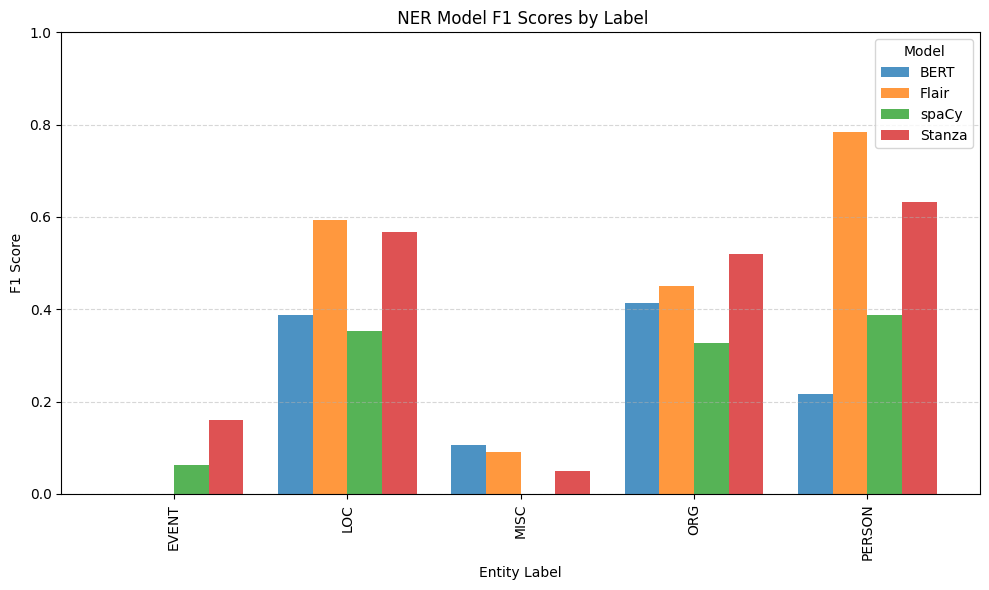

In [ ]:
# Aggregate results (from your code)
all_results = {
    "BERT": bert_results,
    "Flair": flair_results,
    "spaCy": spacy_results,
    "Stanza": stanza_results
}

# Create dict of F1 scores per label per model
f1_data = {}
for model_name, label_metrics in all_results.items():
    for label, scores in label_metrics.items():
        if label not in f1_data:
            f1_data[label] = {}
        f1_data[label][model_name] = scores["f1"]

# Debug: Print f1_data to verify
print("F1 Data:", f1_data)

# Check if f1_data is empty
if not f1_data:
    print("Error: No F1 scores available. Check evaluation results.")
else:
    import pandas as pd
    import matplotlib.pyplot as plt

    # Convert to DataFrame
    df = pd.DataFrame(f1_data).T  # labels as index
    df = df.fillna(0)

    # Debug: Print DataFrame to verify
    print("DataFrame:\n", df)

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))
    df.plot(
        kind='bar',
        ax=ax,
        color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],  # Distinct colors for BERT, Flair, spaCy, Stanza
        alpha=0.8,
        width=0.8
    )
    plt.title(" NER Model F1 Scores by Label")
    plt.ylabel("F1 Score")
    plt.xlabel("Entity Label")
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.legend(title="Model")
    plt.tight_layout()
    plt.savefig("f1_by_label.png", dpi=300, bbox_inches='tight')


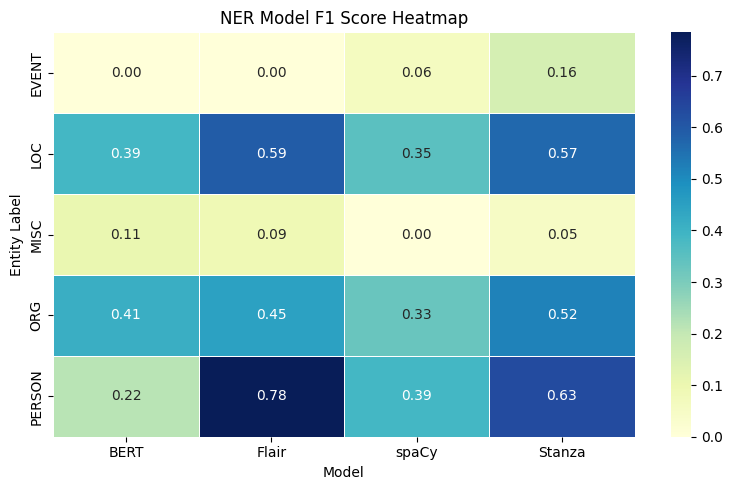

In [ ]:
# Heatmap
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.heatmap(df, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("NER Model F1 Score Heatmap")
plt.xlabel("Model")
plt.ylabel("Entity Label")
plt.tight_layout()
plt.savefig("f1_scores_heatmap.png", dpi=300)

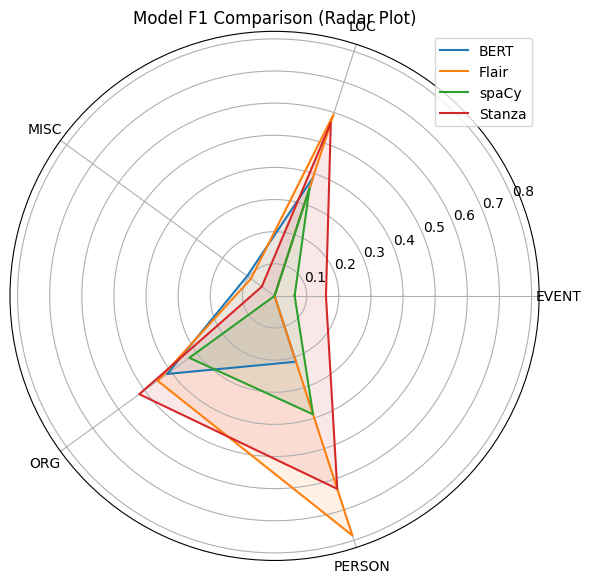

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = list(df.index)
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for model in df.columns:
    values = df[model].tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, label=model)
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Model F1 Comparison (Radar Plot)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


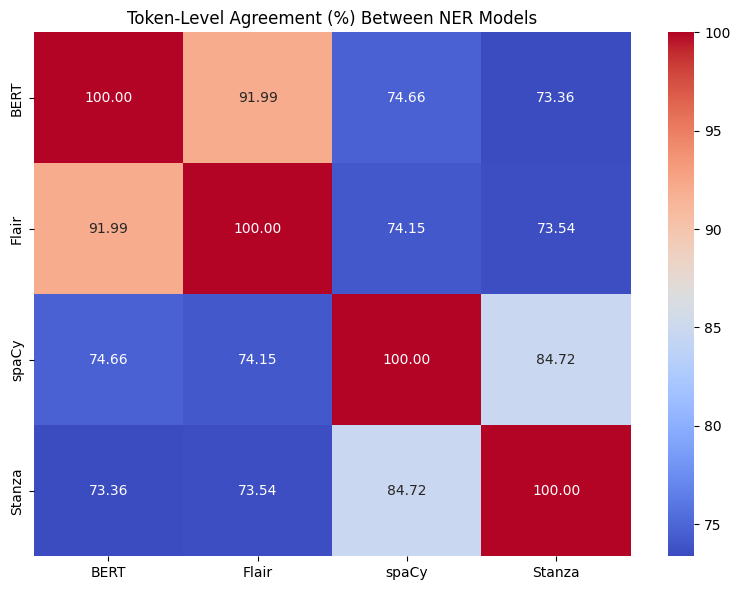

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import defaultdict

from sklearn.metrics import accuracy_score

# Define models and their predictions
models = {
    "BERT": predict_with_bert,
    "Flair": predict_with_flair,
    "spaCy": predict_with_spacy,
    "Stanza": predict_with_stanza
}

# Tokenize helper
def tokenize_text(text):
    return text.split()  # Use a better tokenizer if needed

# Convert span predictions to token-level labels
def get_token_labels(text, spans):
    tokens = tokenize_text(text)
    labels = ['O'] * len(tokens)
    for start, end, label in spans:
        entity_text = text[start:end]
        for i, token in enumerate(tokens):
            if token in entity_text and labels[i] == 'O':
                labels[i] = label
    return labels

# Create dict of token labels for each model
model_token_labels = defaultdict(list)

for i, data in enumerate(annotated_data):
    text = data["text"]
    for model_name, predict_fn in models.items():
        spans = predict_fn(text) # Call the function with the text
        token_labels = get_token_labels(text, spans)
        model_token_labels[model_name].append(token_labels)

# Compute agreement matrix
agreement_df = pd.DataFrame(index=models.keys(), columns=models.keys())

for m1 in models:
    for m2 in models:
        total = 0
        agree = 0
        for lbls1, lbls2 in zip(model_token_labels[m1], model_token_labels[m2]):
            min_len = min(len(lbls1), len(lbls2))
            total += min_len
            agree += sum([1 for i in range(min_len) if lbls1[i] == lbls2[i]])
        agreement = (agree / total) * 100 if total > 0 else 0
        agreement_df.loc[m1, m2] = round(agreement, 2)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(agreement_df.astype(float), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Token-Level Agreement (%) Between NER Models")
plt.tight_layout()
plt.savefig("token_agreement.png", dpi=300)
